<a href="https://colab.research.google.com/github/dustinober1/Oreilly-Applied-Machine-Learning-and-AI-for-Engineers/blob/main/Chapter%2003%20-%20Classification%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Categorical Data

These two lines of code import the pandas library and LabelEncoder class from the sklearn.preprocessing module.

pandas is a popular data manipulation library that provides data structures for efficiently storing and manipulating data in tabular form, as well as many functions for data cleaning, analysis, and visualization.

LabelEncoder is a class that can be used to encode categorical features as integers. It assigns a unique integer to each distinct category in the feature, allowing it to be used as input to machine learning models that require numerical data.

In [24]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder

This code creates a pandas DataFrame df with the specified columns "Length" and "Color", and the given data.

The data is a list of lists, where each inner list represents a row in the DataFrame. The first element of each inner list is the "Length" value for that row, and the second element is the "Color" value.

The pd.DataFrame() function converts this data into a pandas DataFrame object, with the specified column names.


In [2]:
data = [[10, "red"], [20, "blue"], [12, "red"], [16, "green"], [22, "blue"]]
df = pd.DataFrame(data, columns=["Length", "Color"])

This code creates a LabelEncoder object encoder, and uses it to encode the "Color" column of the pandas DataFrame df.

LabelEncoder is a class from the sklearn.preprocessing module that can be used to encode categorical features as integers. It assigns a unique integer to each distinct category in the feature.

encoder.fit_transform(df["Color"]) fits the encoder to the "Color" column of df, and returns the encoded values as a numpy array. The encoded values replace the original "Color" column in df.

df.head() is a method of the pandas DataFrame that returns the first 5 rows of the DataFrame. It is used here to display the updated DataFrame after encoding.

In [3]:
encoder = LabelEncoder()
df["Color"] = encoder.fit_transform(df["Color"])
df.head()

,Length,Color
0,10,2
1,20,0
2,12,2
3,16,1
4,22,0


This code uses the get_dummies() function from the pandas library to create a new set of columns in the DataFrame for each unique category in the "Color" column.

get_dummies() creates new columns with binary values (0 or 1) for each unique category in the specified column. It assigns a value of 1 in the column for each row that has the corresponding category, and a value of 0 in all other columns.

The resulting DataFrame has a separate column for each category in the original "Color" column, with binary values indicating the presence or absence of that category in each row.

In [4]:
data = [[10, "red"], [20, "blue"], [12, "red"], [16, "green"], [22, "blue"]]
df = pd.DataFrame(data, columns=["Length", "Color"])
df = pd.get_dummies(df, columns=["Color"])
df.head()

,Length,Color_blue,Color_green,Color_red
0,10,0,0,1
1,20,1,0,0
2,12,0,0,1
3,16,0,1,0
4,22,1,0,0


# Classifying Passengers Who Sailed on the Titanic

This code reads in a csv file located at the given url "https://raw.githubusercontent.com/jeffprosise/Practical-Machine-Learning/main/Chapter%203/Data/titanic.csv" and creates a pandas DataFrame df containing the data.

pd.read_csv() is a function from the pandas library that reads a csv file and returns a DataFrame. The argument to read_csv() is the path or url to the csv file.

df.head() is a method of the pandas DataFrame that returns the first 5 rows of the DataFrame. It is used here to display the top of the DataFrame.

So, the resulting DataFrame shows the first 5 rows of the Titanic dataset, which contains information about the passengers who were aboard the Titanic when it sank, including their age, sex, ticket class, and survival status. The columns in the DataFrame include "PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", and "Embarked".

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/jeffprosise/Practical-Machine-Learning/main/Chapter%203/Data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This code displays information about the DataFrame df using the info() method of the DataFrame.

info() provides a summary of the DataFrame, including the number of non-null values in each column, the data type of each column, and the amount of memory used by the DataFrame.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This code performs several operations on the DataFrame df:

1. It selects a subset of the columns in the DataFrame, specifically "Survived", "Age", "Sex", and "Pclass", using the indexing operator [].

2. It uses the pd.get_dummies() function to create one-hot encoded columns for the "Sex" and "Pclass" columns of the DataFrame. This converts the categorical variables "Sex" and "Pclass" into numerical variables that can be used in a machine learning model.
3. It drops any rows with missing values using the dropna() method of the DataFrame.
4. Finally, it displays the first 5 rows of the resulting DataFrame using the head() method of the DataFrame.

The resulting DataFrame contains one-hot encoded columns for "Sex" and "Pclass", with no missing values. The columns in the DataFrame are "Survived", "Age", "Sex_female", "Sex_male", "Pclass_1", "Pclass_2", and "Pclass_3". The "Survived" column indicates whether the passenger survived the sinking of the Titanic (1) or not (0), the "Age" column contains the passenger's age, and the one-hot encoded columns indicate the passenger's sex and ticket class.





In [7]:
df = df[["Survived", "Age", "Sex", "Pclass"]]
df = pd.get_dummies(df, columns=["Sex", "Pclass"])
df.dropna(inplace=True) 
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1
3,1,35.0,1,0,1,0,0
4,0,35.0,0,1,0,0,1


This code uses the train_test_split() function from scikit-learn to split the DataFrame df into training and testing sets.

The input variables x and y are defined using the DataFrame df: x is a DataFrame that contains all the columns of df except for the "Survived" column, and y is a Series that contains only the "Survived" column of df.

The train_test_split() function then splits the data into training and testing sets. The test_size parameter specifies the fraction of the data that should be used for testing (in this case, 20% of the data). The stratify parameter is used to ensure that the classes in y are evenly represented in both the training and testing sets. The random_state parameter is used to ensure that the results are reproducible.

The resulting variables x_train, x_test, y_train, and y_test contain the training and testing sets, respectively. The x_train and x_test DataFrames contain all the columns of x, while y_train and y_test are Series containing only the "Survived" column.

In [8]:
from sklearn.model_selection import train_test_split

x = df.drop("Survived", axis=1)
y = df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    stratify=y,
                                                    random_state=0)

This code trains a logistic regression model using scikit-learn's LogisticRegression class, and then uses the trained model to make predictions on the test data and calculate the model's accuracy.

The first line of code creates an instance of the LogisticRegression class with a random_state of 0. The random_state parameter is used to ensure that the results are reproducible.

The second line of code fits the logistic regression model to the training data using the fit() method of the model object. The fit() method learns the parameters of the logistic regression model from the training data.

The third line of code uses the score() method of the model object to calculate the accuracy of the model on the test data. The score() method returns the mean accuracy on the given test data and labels. The accuracy is a measure of how well the model is able to correctly predict the survival status of passengers in the test data, and is calculated as the fraction of correct predictions.

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8321678321678322

This code uses scikit-learn's cross_val_score() function to perform cross-validation on the logistic regression model.

The cross_val_score() function is a convenient way to perform k-fold cross-validation, which involves splitting the data into k subsets, and using each subset in turn as a validation set while the model is trained on the remaining k-1 subsets.

The first argument to cross_val_score() is the model object (model). The second and third arguments are the input features (x) and target variable (y). The cv parameter is used to specify the number of folds to use in the cross-validation (in this case, 5 folds).

The cross_val_score() function returns an array of accuracy scores, one for each fold. The mean() method is then used to compute the mean accuracy score across all the folds. This gives an estimate of the model's performance on unseen data, and is a more reliable estimate than the single accuracy score computed on the test data in the previous code snippet.

In [10]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=5).mean()

0.7857480547621394

This code creates a confusion matrix plot using scikit-learn's ConfusionMatrixDisplay class.

The from_estimator() method of the ConfusionMatrixDisplay class is used to generate the confusion matrix for the logistic regression model. The first argument is the model object (model). The second and third arguments are the input features (x_test) and target variable (y_test) for the test data.

The display_labels parameter is used to specify the class labels ("Perished" and "Survived") that will be displayed on the x and y axes of the plot.

The cmap parameter is used to specify the color map for the plot (in this case, "Blues").

The xticks_rotation parameter is used to specify the rotation angle for the x-axis tick labels (in this case, "vertical").

The resulting plot shows the number of true positives (top left), false positives (top right), false negatives (bottom left), and true negatives (bottom right) for the logistic regression model on the test data. The diagonal elements (true positives and true negatives) show the number of correct predictions, while the off-diagonal elements (false positives and false negatives) show the number of incorrect predictions.

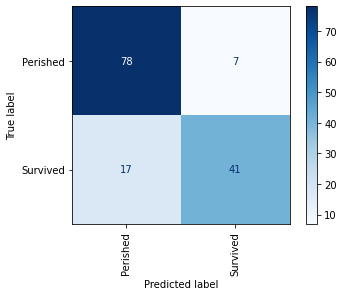

In [11]:
%matplotlib inline 
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test,
                   display_labels = ["Perished", "Survived"],
                   cmap="Blues", xticks_rotation="vertical")

In this code, scikit-learn's precision_score and recall_score functions are used to calculate the precision and recall of the logistic regression model's predictions on the test data.

The predicted target variable (y_pred) is obtained by calling the predict method on the model object with the input features (x_test) as the argument.

The precision_score function is then called with the true target variable (y_test) and the predicted target variable (y_pred) as arguments to compute the precision of the model's predictions.

Similarly, the recall_score function is called with y_test and y_pred as arguments to compute the recall of the model's predictions.

The recall variable is assigned the same value as sensitivity, as these terms are often used interchangeably to refer to the same metric.

The specificity variable is computed by calling the recall_score function again with y_test, y_pred, and pos_label=0 as arguments. The pos_label parameter is used to specify which class label is considered the "positive" class for the calculation of recall. In this case, the value of pos_label is set to 0 (which corresponds to the "Perished" class) to calculate the recall of the "Perished" class. The resulting value is equal to the specificity of the model's predictions for the "Survived" class.

In [12]:
from sklearn.metrics import precision_score, recall_score

y_pred = model.predict(x_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
sensitivity = recall
specificity = recall_score(y_test, y_pred, pos_label=0)

In [13]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

Precision: 0.8541666666666666
Recall: 0.7068965517241379
Sensitivity: 0.7068965517241379
Specificity: 0.9176470588235294


This code creates a pandas DataFrame called female with one row of input features for a hypothetical female passenger with age 30, who is traveling in first class.

The DataFrame is then passed as an argument to the predict method of the logistic regression model model. The value of model.predict(female) is an array containing the predicted class label (0 or 1) for the given input features. Since female corresponds to a hypothetical female passenger, the predicted class label represents the model's prediction of whether the passenger would have survived the Titanic disaster.

The [0] at the end of the code is used to extract the first (and only) element of the predicted class label array as a scalar value, which is then returned by the expression. Therefore, the code predicts whether the hypothetical female passenger would have survived the Titanic disaster.

In [14]:
female = pd.DataFrame({"Age": [30], "Sex_female": [1], "Sex_male": [0],
                       "Pclass_1": [1], "Pclass_2": [0], "Pclass_3": [0]})
model.predict(female)[0]

1

The code below calculates the predicted probability of survival for the hypothetical female passenger with input features specified in the female DataFrame. The predict_proba method of the logistic regression model model returns the predicted probabilities of each class label (0 and 1) for the input features. Since we are interested in the probability of survival (class label 1), we access the probability of class label 1 by indexing the second element of the predicted probabilities array returned by model.predict_proba(female) using [0][1].

The formatted string f"Probability of Survival: {probability: .1%}" prints the probability of survival as a percentage with one decimal point. The output of the code tells us the predicted probability of survival for the hypothetical female passenger.

In [15]:
probability = model.predict_proba(female)[0][1]
print(f"Probability of Survival: {probability: .1%}")

Probability of Survival:  91.6%


The predict method of the logistic regression model model is used to predict the class label (0 or 1) for the input features. We pass the male DataFrame as input to the predict method and access the first element of the predicted class label array using [0].

Next, the predict_proba method of the logistic regression model model is used to calculate the predicted probabilities of each class label (0 and 1) for the input features. Since we are interested in the probability of survival (class label 1), we access the probability of class label 1 by indexing the second element of the predicted probabilities array returned by model.predict_proba(male) using [0][1].

Finally, the formatted string f"Probability of Survival: {probability: .1%}" prints the probability of survival as a percentage with one decimal point. The output of the code tells us the predicted probability of survival for the hypothetical male passenger.

In [16]:
male = pd.DataFrame({"Age": [60], "Sex_female": [0], "Sex_male": [1],
                       "Pclass_1": [0], "Pclass_2": [0], "Pclass_3": [1]})
model.predict(female)[0]
probability = model.predict_proba(male)[0][1]
print(f"Probability of Survival: {probability: .1%}")

Probability of Survival:  2.9%


# Detecting Credit Card Fraud


In [18]:
import pandas as pd

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


These lines of code will print True if there are any NaN values, if not all the values are finite, or if any of the values are too large for float64.

In [25]:
print(np.any(np.isnan(x)))
print(np.all(np.isfinite(x)))
print(np.all(np.abs(x) < np.finfo(np.float64).max))

True
False
False


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111004 entries, 0 to 111003
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    111004 non-null  int64  
 1   V1      111004 non-null  float64
 2   V2      111004 non-null  float64
 3   V3      111004 non-null  float64
 4   V4      111004 non-null  float64
 5   V5      111004 non-null  float64
 6   V6      111004 non-null  float64
 7   V7      111004 non-null  float64
 8   V8      111004 non-null  float64
 9   V9      111004 non-null  float64
 10  V10     111004 non-null  float64
 11  V11     111004 non-null  float64
 12  V12     111004 non-null  float64
 13  V13     111004 non-null  float64
 14  V14     111004 non-null  float64
 15  V15     111004 non-null  float64
 16  V16     111004 non-null  float64
 17  V17     111004 non-null  float64
 18  V18     111004 non-null  float64
 19  V19     111004 non-null  float64
 20  V20     111004 non-null  float64
 21  V21     11

This will replace all the NaN values in the DataFrame df with 0.0.

The fillna() method takes the value argument, which specifies the value to use for filling the NaN values. In this case, we set it to 0.0. The inplace=True argument ensures that the changes are made to the original DataFrame df in place, rather than creating a new DataFrame.

Note that replacing missing values with a constant value such as 0.0 is just one of several possible strategies for handling missing data. You may want to explore other strategies, such as imputation or deletion, depending on the nature of your data and the problem you are trying to solve.

In [26]:
df.fillna(value=0.0, inplace=True)

This code imports the train_test_split function from the model_selection module of the Scikit-learn library. The purpose of this function is to split a dataset into training and testing subsets, which are used for model training and evaluation, respectively.

The code then assumes that the dataset is stored in a Pandas DataFrame named df. It creates a new DataFrame x by dropping the Time and Class columns from df. The x DataFrame contains the features (input variables) for the model. The code also creates a Series y by selecting the Class column from df. The y Series contains the target variable for the model.

The train_test_split function is then called with the following arguments:

- x and y are the feature and target variables, respectively.
test_size is set to 0.2, which means that 20% of the dataset will be used for testing, and 80% for training.
- stratify is set to y, which means that the splitting is done in a way that preserves the proportion of the target variable in each subset. This is useful if the target variable is imbalanced, meaning that there are more examples of one class than the others.
- random_state is set to 0, which means that the splitting is done in a reproducible way, so that the same random splitting will be applied each time the code is run.

Finally, the function returns four objects: x_train, x_test, y_train, and y_test, which are the training and testing subsets of the feature and target variables, respectively. These subsets can be used for training and evaluating a machine learning model.

In [27]:
from sklearn.model_selection import train_test_split

x = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

This code imports the LogisticRegression class from the linear_model module of the Scikit-learn library, and creates a new instance of this class called lr_model. The LogisticRegression class is used to implement logistic regression, which is a popular classification algorithm in machine learning.

The LogisticRegression constructor takes several optional parameters, which are used to configure the behavior of the model. In this case, two parameters are used:

- random_state: This parameter is used to ensure that the results of the model are reproducible across different runs. It sets the seed for the random number generator used by the model.
- max_iter: This parameter is used to set the maximum number of iterations that the solver should run. The solver is used to optimize the model parameters to fit the training data. Setting a higher value for max_iter can increase the accuracy of the model, but it also increases the training time.

After creating the lr_model instance, the code calls the fit() method of the model to train the model on the training data. The fit() method takes two arguments:

- x_train: This is the feature matrix (input data) for the training set.
- y_train: This is the target vector (output data) for the training set.

During training, the logistic regression algorithm learns the relationship between the input features and the output target, and finds the optimal values of the model parameters to minimize the error between the predicted output and the actual output on the training set.

Once the model is trained, you can use it to make predictions on new data using the predict() method of the model.

In [28]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0, max_iter=5000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=5000, random_state=0)

This code imports the ConfusionMatrixDisplay class from the sklearn.metrics module of the Scikit-learn library, and creates a new instance of this class called cmd. The ConfusionMatrixDisplay class is used to generate and display a confusion matrix, which is a table that summarizes the performance of a classification model.

The from_estimator() method of the ConfusionMatrixDisplay class is then called to generate the confusion matrix for the logistic regression model (lr_model) on the test set (x_test and y_test). The from_estimator() method takes several arguments:

- estimator: This is the trained machine learning model (lr_model in this case) that will be evaluated using the test set.
- X: This is the feature matrix (input data) for the test set.
- y_true: This is the target vector (output data) for the test set.
display_labels: This is a list of labels to use for the rows and columns of the confusion matrix. In this case, the labels are set to ['Legitimate', 'Fraudulent'].
- cmap: This parameter specifies the color map to use for the display. In this case, the color map is set to 'Blues'.
- xticks_rotation: This parameter specifies the rotation angle of the x-axis tick labels. In this case, the tick labels are rotated vertically for better visibility.

Once the confusion matrix is generated, the cmd instance can be displayed using the plot() method. For example, you can run:

This will display the confusion matrix for the logistic regression model. The confusion matrix displays the number of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) for the model on the test set. The TP and TN values represent the number of correct predictions, while the FP and FN values represent the number of incorrect predictions.

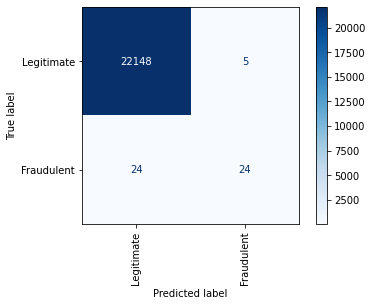

In [29]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

labels = ['Legitimate', 'Fraudulent']
cmd.from_estimator(lr_model, x_test, y_test, display_labels=labels,
                   cmap='Blues', xticks_rotation='vertical')

This code imports the RandomForestClassifier class from the ensemble module of the Scikit-learn library, and creates a new instance of this class called rf_model. The RandomForestClassifier class is used to implement a random forest algorithm, which is an ensemble learning method for classification tasks.

The RandomForestClassifier constructor takes several optional parameters, which are used to configure the behavior of the model. In this case, one parameter is used:

- random_state: This parameter is used to ensure that the results of the model are reproducible across different runs. It sets the seed for the random number generator used by the model.

After creating the rf_model instance, the code calls the fit() method of the model to train the model on the training data. The fit() method takes two arguments:

- x_train: This is the feature matrix (input data) for the training set.
- y_train: This is the target vector (output data) for the training set.

During training, the random forest algorithm builds a collection of decision trees based on random subsets of the input features and data points. The algorithm then aggregates the output of these individual trees to produce a final prediction for a given input.

Once the model is trained, the code generates a confusion matrix for the model using the from_estimator() method of the ConfusionMatrixDisplay class, which is similar to what was done for the logistic regression model. The from_estimator() method takes the same arguments as before, but this time it takes the trained random forest model (rf_model) as the first argument instead of the logistic regression model.

After generating the confusion matrix using cmd.from_estimator(), the confusion matrix can be displayed using the plot() method of the cmd instance.

Note that because the random forest algorithm is a more complex model than logistic regression, it may take longer to train and may require more resources to run. However, it can often achieve higher accuracy on complex classification tasks.

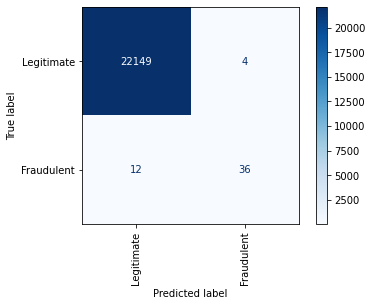

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train, y_train)

cmd.from_estimator(rf_model, x_test, y_test, display_labels=labels,
                   cmap='Blues', xticks_rotation='vertical')

This code imports the GradientBoostingClassifier class from the ensemble module of the Scikit-learn library, and creates a new instance of this class called gbm_model. The GradientBoostingClassifier class is used to implement a gradient boosting algorithm, which is another ensemble learning method for classification tasks.

The GradientBoostingClassifier constructor takes several optional parameters, which are used to configure the behavior of the model. In this case, one parameter is used:

- random_state: This parameter is used to ensure that the results of the model are reproducible across different runs. It sets the seed for the random number generator used by the model.

After creating the gbm_model instance, the code calls the fit() method of the model to train the model on the training data. The fit() method takes two arguments:

- x_train: This is the feature matrix (input data) for the training set.
- y_train: This is the target vector (output data) for the training set.

During training, the gradient boosting algorithm builds an ensemble of decision trees sequentially, with each tree built to correct the errors of the previous tree. The algorithm uses gradient descent to minimize a loss function that measures the difference between the model's predictions and the actual targets.

Once the model is trained, the code generates a confusion matrix for the model using the from_estimator() method of the ConfusionMatrixDisplay class, which is similar to what was done for the logistic regression and random forest models. The from_estimator() method takes the same arguments as before, but this time it takes the trained gradient boosting model (gbm_model) as the first argument instead of the logistic regression or random forest model.

After generating the confusion matrix using cmd.from_estimator(), the confusion matrix can be displayed using the plot() method of the cmd instance.

Note that because the gradient boosting algorithm is also a complex model, it may take longer to train and may require more resources to run. However, it can often achieve higher accuracy on complex classification tasks than simpler models like logistic regression.

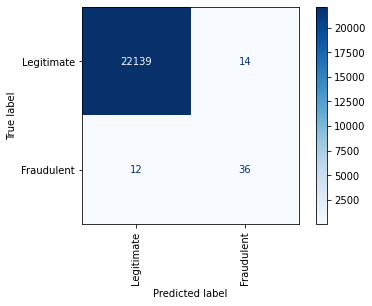

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(random_state=0)
gbm_model.fit(x_train, y_train)

cmd.from_estimator(gbm_model, x_test, y_test, display_labels=labels,
                   cmap='Blues', xticks_rotation='vertical')

This code computes several evaluation metrics for the random forest classifier that was trained and tested earlier.

After training the random forest classifier rf_model and predicting the labels of the test set, the code uses the precision_score and recall_score functions from Scikit-learn to compute the precision and recall of the classifier. These are two commonly used evaluation metrics for binary classification tasks.

- Precision measures the proportion of true positive predictions among all positive predictions, and is given by: TP / (TP + FP), where TP is the number of true positives (fraudulent transactions correctly predicted as fraudulent) and FP is the number of false positives (legitimate transactions incorrectly predicted as fraudulent). High precision indicates that the classifier produces few false positive predictions.
- Recall (also known as sensitivity) measures the proportion of true positive predictions among all actual positive cases, and is given by: TP / (TP + FN), where FN is the number of false negatives (fraudulent transactions incorrectly predicted as legitimate). High recall indicates that the classifier produces few false negative predictions.

The code also computes the specificity, which is the proportion of true negative predictions among all actual negative cases. Specifically, it uses the recall_score function with the pos_label=0 argument to compute the recall of the negative class (legitimate transactions) and interprets it as the specificity. The formula for specificity is: TN / (TN + FP), where TN is the number of true negatives (legitimate transactions correctly predicted as legitimate) and FP is the number of false positives.

Finally, the code prints out the computed values of precision, recall, sensitivity, and specificity using f-strings to format the output.

In [32]:
from sklearn.metrics import precision_score, recall_score

y_pred = rf_model.predict(x_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
sensitivity = recall
specificity = recall_score(y_test, y_pred, pos_label=0)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

Precision: 0.9
Recall: 0.75
Sensitivity: 0.75
Specificity: 0.9998194375479619


# Building a Digit Recognition Model

This code loads the digits dataset from the Scikit-learn datasets module, which is a collection of handwritten digits images. The digits variable is a dictionary-like object that contains various fields, including the images and the target labels.

The code then prints out the shapes of the digits.images and digits.target arrays using the shape attribute.

- The digits.images array contains the pixel intensities of the images and has a shape of (1797, 8, 8), which means that there are 1797 images in the dataset, each with a size of 8 by 8 pixels.
- The digits.target array contains the target labels for each image, indicating which digit the image represents. It has a shape of (1797,), which means that it is a 1-dimensional array of length 1797.

In [33]:
from sklearn import datasets

digits = datasets.load_digits()
print('digits.images: ' + str(digits.images.shape))
print('digits.target: ' + str(digits.target.shape))

digits.images: (1797, 8, 8)
digits.target: (1797,)


This code retrieves the first image in the digits.images array, which is a 2-dimensional array of shape (8, 8) containing the pixel intensities of the image.

The digits.images array is a 3-dimensional array of shape (1797, 8, 8), where the first dimension corresponds to the number of images and the last two dimensions correspond to the size of each image (8 by 8 pixels). By indexing with [0], the code selects the first image in the array, which is a 2-dimensional array of shape (8, 8).

Each element in the array represents the grayscale intensity of a pixel in the image, ranging from 0 (black) to 15 (white).

In [34]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

This code visualizes the first image in the digits.images array using matplotlib.

The code first sets various tick parameters to remove the ticks and labels from the plot using the tick_params function.

The code then uses the imshow function to display the image. The cmap parameter sets the colormap to gray_r, which is a grayscale colormap with reversed intensity. This means that the darker pixels have higher intensity values, which makes the image easier to see.

Overall, the code displays the first image in the digits dataset as a grayscale image.

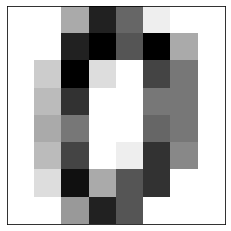

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False,
                right=False, labelbottom=False, labelleft=False)
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

This code retrieves the first target label in the digits.target array, which is an integer indicating the digit that the first image in the digits.images array represents.

The digits.target array is a 1-dimensional array of shape (1797,) that contains the target labels for each image in the digits.images array. The target label of the first image is stored in the first element of the array, which is accessed by indexing with [0].

In this case, digits.target[0] is 0, which means that the first image in the dataset represents the digit 0.

In [36]:
digits.target[0]

0

This code displays the first 50 images in the digits dataset, along with their corresponding target labels, as a 5x10 grid of subplots using matplotlib.

The plt.subplots function creates a figure with 5 rows and 10 columns of subplots, each with no tick marks. The figsize parameter sets the size of the figure, and the subplot_kw parameter sets the tick parameters for each subplot.

The code then uses a for loop to iterate over the first 50 elements of the digits.images and digits.target arrays. For each element, the code displays the corresponding image in a subplot using ax.imshow, and displays the corresponding target label above the image using ax.text.

Overall, the code displays a grid of subplots, where each subplot shows an image and its corresponding target label. The images are displayed as grayscale images, and the target labels are displayed above each image.

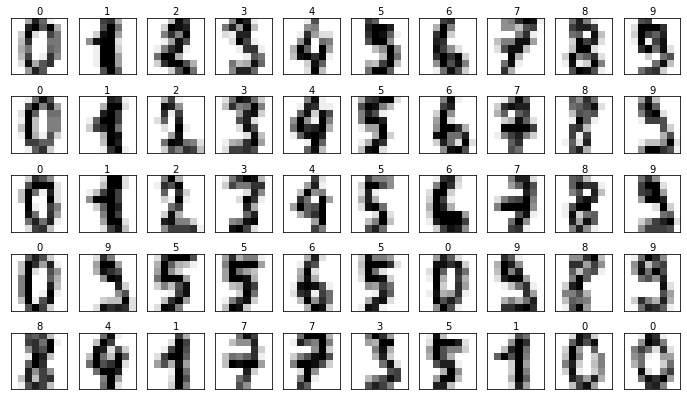

In [37]:
fig, axes = plt.subplots(5, 10, figsize=(12, 7),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(digits.target[i]), transform=ax.transAxes)

This code creates a histogram of the target labels in the digits dataset using matplotlib.

The plt.xticks([]) function removes the tick marks from the x-axis of the plot.

The plt.hist function creates a histogram of the digits.target array, with rwidth=0.9 setting the relative width of the bars in the histogram to 0.9. This means that the bars are slightly narrower than the default width.

Overall, the code displays a histogram of the target labels in the digits dataset, with the x-axis showing the target labels and the y-axis showing the frequency of each target label. The histogram indicates that there are roughly equal numbers of images for each digit from 0 to 9 in the dataset.

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

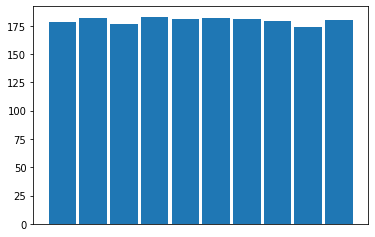

In [38]:
plt.xticks([])
plt.hist(digits.target, rwidth=0.9)

This code splits the digits dataset into training and testing sets, and trains a logistic regression model on the training data using scikit-learn.

The train_test_split function from scikit-learn is used to split the digits.data and digits.target arrays into training and testing sets, with the testing set size set to 20% of the total data and the random state set to 0 for reproducibility.

The code then creates a logistic regression model using the LogisticRegression class from scikit-learn, with max_iter=5000 setting the maximum number of iterations for the solver.

Finally, the model is trained on the training data using the fit method of the logistic regression object, with x_train and y_train as inputs. The trained model can then be used to make predictions on the testing data using the predict method of the logistic regression object.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=0)

model = LogisticRegression(max_iter=5000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

The score method of a scikit-learn model returns the mean accuracy on the given test data and labels.

In this case, model.score(x_test, y_test) returns the mean accuracy of the logistic regression model on the testing data (x_test) and labels (y_test). The accuracy is a measure of how well the model predicts the correct digit for each image in the testing data. Specifically, it is the proportion of correct predictions made by the model.

This code computes the mean accuracy of the logistic regression model on the testing data and prints the result. The output value ranges from 0 to 1, where 1 indicates perfect accuracy and 0 indicates the model made no correct predictions.

In [40]:
model.score(x_test, y_test)

0.9583333333333334

This code generates a confusion matrix plot for the logistic regression model on the testing data using ConfusionMatrixDisplay from sklearn.metrics. A confusion matrix is a table that summarizes the performance of a classifier by comparing predicted and actual labels.

The plot displays the confusion matrix in a heatmap format using the cmap parameter. The diagonal represents the number of correct predictions for each digit, while off-diagonal values indicate misclassifications. The color of each cell corresponds to the count of data points.

The colorbar parameter is set to False to remove the colorbar in the plot. ax.grid(False) is used to remove grid lines from the plot.

The sns.set() command sets the default style for the plot using the Seaborn package.

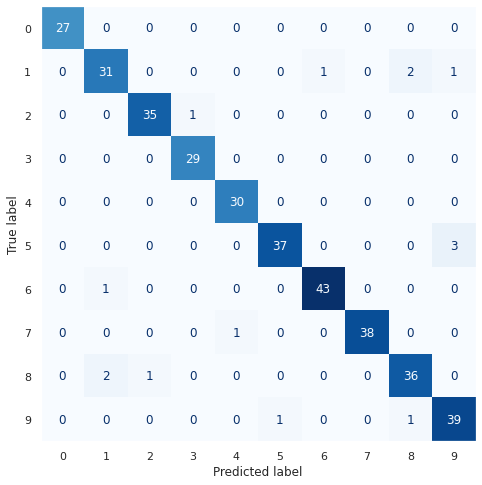

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as cmd
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(8, 8))
ax.grid(False)
cmd.from_estimator(model, x_test, y_test, cmap='Blues', colorbar=False, ax=ax)

The first line sns.reset_orig() undoes the sns.set() command used in the previous code cell, which resets the default style to the original matplotlib style.

The code then displays the image for the digit at index 100 from the digits dataset using plt.imshow(). The cmap parameter is set to plt.cm.gray_r to display the image in grayscale. The tick_params() function is used to remove the tick marks and labels on the x and y axes.

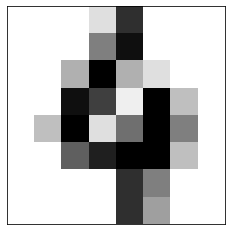

In [42]:
sns.reset_orig() # Undo sns.set()
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False,
                right=False, labelbottom=False, labelleft=False)
plt.imshow(digits.images[100], cmap=plt.cm.gray_r)

model.predict([digits.data[100]])[0] predicts the target value of the digit at index 100 in the digits dataset using the trained logistic regression model model. The input to model.predict() is a list of one element, digits.data[100], which is a 1D array of length 64 containing the pixel values of the digit image at index 100.

The predicted target value for this image is 4.

In [43]:
model.predict([digits.data[100]])[0]

4

model.predict_proba([digits.data[100]]) returns the predicted probabilities for each target class for the digit at index 100 in the digits dataset using the trained logistic regression model model. The input to model.predict_proba() is a list of one element, digits.data[100], which is a 1D array of length 64 containing the pixel values of the digit image at index 100.

Since there are 10 possible target classes in the digits dataset (0 through 9), the output of model.predict_proba() is an array of shape (1, 10), where the i-th element of the array represents the predicted probability that the digit belongs to class i.

In [44]:
model.predict_proba([digits.data[100]])

array([[6.43523576e-11, 5.01282211e-09, 9.41221272e-21, 3.62822959e-22,
        9.99999987e-01, 1.12858978e-15, 7.31895740e-09, 1.55121447e-10,
        2.46197046e-12, 6.01922718e-22]])

The line model.predict_proba([digits.data[100]])[0][4] returns the probability that the image at index 100 in the dataset represents the digit 4. The predict_proba method returns the predicted probabilities of each class, and in this case we are selecting the probability of the digit 4, which is the 5th element in the array (Python uses 0-based indexing).

In [45]:
model.predict_proba([digits.data[100]])[0][4]


0.9999999874462836